<a href="https://colab.research.google.com/github/QaziSaim/DeepLearning--DeepNeuralNetwork-/blob/main/CNN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Input
from tensorflow.keras import layers,models,Model
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
max_pooling_layer = MaxPooling2D(
    pool_size=(2,2),strides=None,padding='valid',data_format=None
)
avg_pooling_layer = AveragePooling2D(
    pool_size=(2,2),strides=None,padding='valid',data_format=None
)

In [9]:
fully_connected_layer = Dense(
    units=128,activation='relu',kernel_initializer='glorot_uniform'
)

In [10]:
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()
# train_scale = scalar.fit_transform(train_images)
# test_scale = scalar.transform(test_images)
train_images,test_images = train_images/255.0,test_images/255.0
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [11]:
train_images.shape

(50000, 32, 32, 3)

In [12]:
train_images.size

153600000

In [13]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [14]:
test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

#### With FunctionalAPI

In [ ]:
from tensorflow.keras.regularizers.L1

In [20]:
inputs = Input(shape=(32,32,3))
layer1 = Conv2D(32,(3,3),activation='relu')(inputs)
layer2  = MaxPooling2D(pool_size=(2,2))(layer1)
layer2 = Flatten()(layer2)
layer3 = Dense(128,activation='relu')(layer2)
layer4 = Dense(10,activation='softmax')(layer3)
model = Model(inputs=inputs,outputs=layer4)
model.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,914 (3.52 MB)

 Trainable params: 923,914 (3.52 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(train_images,train_labels,epochs=30,batch_size=32,validation_data=(test_images,test_labels))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4172 - loss: 1.6221 - val_accuracy: 0.5233 - val_loss: 1.3715
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5881 - loss: 1.1657 - val_accuracy: 0.6025 - val_loss: 1.1293
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6393 - loss: 1.0285 - val_accuracy: 0.6160 - val_loss: 1.0871
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6733 - loss: 0.9321 - val_accuracy: 0.6288 - val_loss: 1.0612
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7035 - loss: 0.8480 - val_accuracy: 0.6373 - val_loss: 1.0367
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7298 - loss: 0.7694 - val_accuracy: 0.6430 - val_loss: 1.0627
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7577 - loss: 0.6915 - val_accuracy: 0.6397 - val_loss: 1.0567
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7782 - loss: 0.6270 

In [23]:
test_loss,test_accuracy = model.evaluate(test_images,test_labels)
print('loss ',test_loss)
print('accuracy ',test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6149 - loss: 3.1415
loss  3.157485246658325
accuracy  0.6152999997138977


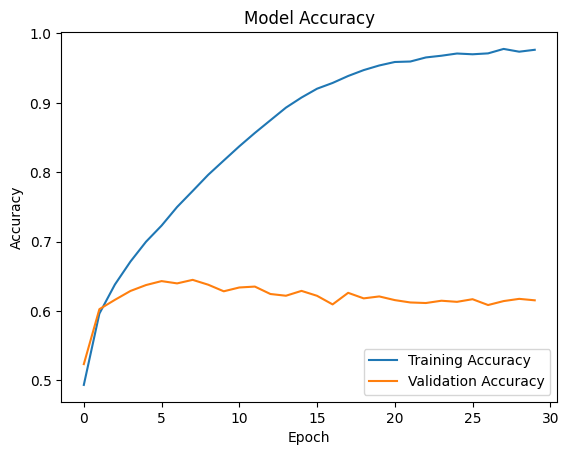

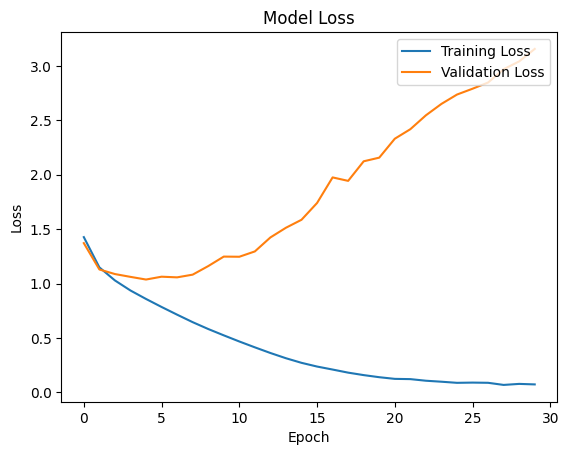

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

### With Sequential API

In [ ]:
model = models.Sequential()
model.add(inputs)
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       921,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923,914 (3.52 MB)

 Trainable params: 923,914 (3.52 MB)

 Non-trainable params: 0 (0.00 B)